In [22]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as data_reader
import matplotlib.pyplot as plt
import joblib

from sklearn import linear_model, metrics
from information.data import DataSet, PreProcessing
from visualization.chart import Plot

In [23]:
orig_appl = data_reader.get_data_yahoo('AAPL', start=datetime.datetime(2011, 1, 1), end=datetime.datetime(2019, 8, 9))
orig_spy = data_reader.get_data_yahoo('SPY', start=datetime.datetime(2011, 1, 1), end=datetime.datetime(2019, 8, 9))

In [24]:
appl = orig_appl.copy()
spy = orig_spy.copy()

appl.dropna(inplace=True)
spy.dropna(inplace=True)

appl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2165.000000,2165.000000,2165.000000,2165.000000,2.165000e+03,2165.000000
mean,113.855584,111.821864,112.852056,112.860355,6.839653e+07,106.138141
std,47.412521,46.616295,46.989447,47.025056,5.217773e+07,48.551724
min,45.385715,44.357143,45.240002,45.045715,1.136200e+07,39.194321
25%,75.841431,74.511429,75.028572,75.137146,3.079100e+07,67.156746
50%,106.000000,104.410004,104.889999,105.220001,5.103420e+07,98.083740
75%,150.130005,146.759995,148.300003,148.960007,9.108610e+07,144.023117
max,233.470001,229.779999,230.779999,232.070007,4.702495e+08,227.839798


In [25]:
data_set = DataSet()
appl = data_set.calculate_alpha_and_beta(spy, appl, 64)
appl = data_set.get_technical_indicators(appl, spy)

In [26]:
appl.dropna(inplace=True)
appl.describe()

,High,Low,Open,Close,Volume,Adj Close,ma7,ma21,SMA100,26ema,...,20sd,upper_band,lower_band,ema,ROC,SPY_SMA_100,SPY_Vol,Log_Returns,Vol,Sharpe_Ratio
count,2065.000000,2065.000000,2065.000000,2065.000000,2.065000e+03,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,...,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000
mean,116.970957,114.878262,115.936585,115.946093,6.604698e+07,109.207463,108.979080,108.430398,105.502022,108.244526,...,2.973651,114.377700,102.483096,105.574803,9.035641,184.735621,0.133374,0.000758,0.250183,0.004345
std,46.331082,45.562538,45.921978,45.958448,5.070170e+07,47.616888,47.519826,47.254955,45.834757,47.066766,...,2.021622,49.820553,44.907346,45.647821,17.035931,53.795093,0.058152,0.016406,0.068137,0.008723
min,45.385715,44.357143,45.240002,45.045715,1.136200e+07,39.194321,40.241814,41.051244,42.467190,41.179353,...,0.479299,42.663556,38.379241,42.048565,-36.348564,101.938654,0.049786,-0.131885,0.103573,-0.018383
25%,78.639999,76.980003,78.000000,77.781425,2.975920e+07,69.545288,69.485370,69.645202,68.317543,69.449843,...,1.653032,73.531637,65.347228,67.395432,-2.384172,137.562422,0.096781,-0.006952,0.204289,-0.001112
50%,108.900002,106.820000,107.900002,107.949997,4.895100e+07,100.794250,101.180101,101.326626,97.801066,100.632901,...,2.337777,106.079336,95.215096,98.092649,10.913127,185.044315,0.119653,0.000626,0.237389,0.004087
75%,153.979996,151.130005,153.169998,153.070007,8.639330e+07,147.838058,147.950893,146.280142,140.457659,145.136181,...,3.650422,152.839737,139.277466,138.089240,19.693310,227.477768,0.150378,0.009584,0.285240,0.009707
max,233.470001,229.779999,230.779999,232.070007,3.765300e+08,227.839798,223.224060,219.401228,205.928441,218.637046,...,15.069447,228.119122,211.761917,205.801093,65.701649,286.355105,0.367730,0.085022,0.471409,0.033084


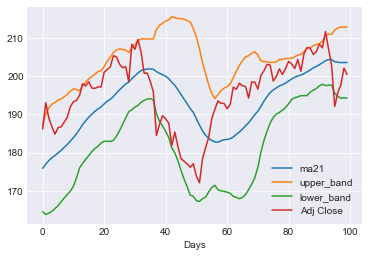

In [27]:
sub_appl = appl.tail(100)
data_points = range(len(sub_appl))
plt.plot(data_points, sub_appl["ma21"], label="ma21")
plt.plot(data_points, sub_appl["upper_band"], label="upper_band")
plt.plot(data_points, sub_appl["lower_band"], label="lower_band")
plt.plot(data_points, sub_appl["Adj Close"], label="Adj Close")
plt.xlabel("Days")
plt.legend()
plt.show()

In [28]:
appl['close'] = appl['Adj Close']
appl = appl.drop(['Adj Close', 'Close', 'Volume'], axis=1)

In [29]:
preprocessing = PreProcessing()
train, test = preprocessing.split_data(appl.values)
print("Train set shape: ", train.shape)
print("Test set shape: ", test.shape)

Train set shape:  (1652, 22)
Test set shape:  (413, 22)


In [30]:
p_train, p_test = preprocessing.normalize_data(train, test, path="./data/normalizer.plk")
print("Train set shape: ", p_train.shape)
print("Test set shape: ", p_test.shape)

Train set shape:  (1652, 22)
Test set shape:  (413, 22)


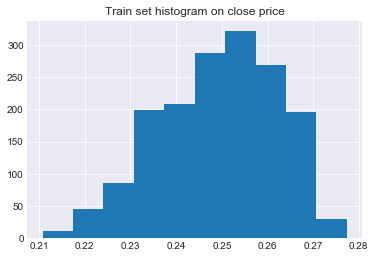

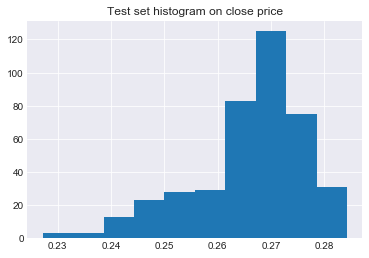

In [31]:
plt.hist(p_train[:,-1])
plt.title("Train set histogram on close price") 
plt.show()

plt.hist(p_test[:,-1])
plt.title("Test set histogram on close price") 
plt.show()

In [32]:
x_train, y_train = preprocessing.formate_data(p_train, 24, 1)
x_test, y_test = preprocessing.formate_data(p_test, 24, 1)

print("X train shape:", x_train.shape)
print("Y train shape:", y_train.shape)

print("X test shape:", x_test.shape)
print("Y test shape:", y_test.shape)

X train shape: (1627, 24, 21)
Y train shape: (1627, 1)
X test shape: (388, 24, 21)
Y test shape: (388, 1)


In [33]:
X = np.reshape(x_train, (1627, 24 * 21))
y = y_train
reg = linear_model.LinearRegression().fit(X, y)
print(reg.score(X, y))

0.9602350229117642


In [34]:
Xt = np.reshape(x_test, (388, 24 * 21))
yt = y_test
pred = reg.predict(Xt)
print("yt shape: ", yt.shape)
print("pred shape: ", pred.shape)

yt shape:  (388, 1)
pred shape:  (388, 1)


In [35]:
mse = metrics.mean_squared_error(yt, pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  1.7404662924395013e-05


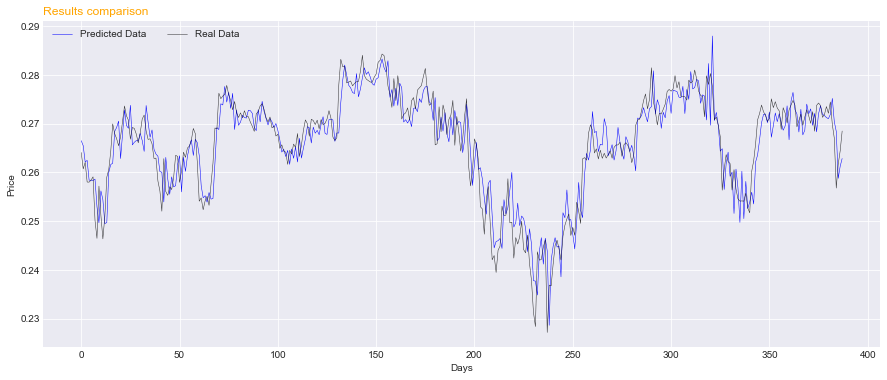

In [36]:
plot = Plot()
plot.plot_results_against_true_data(pred, yt)

In [37]:
x_train, y_train = preprocessing.formate_data(p_train, 24, 1, with_target=True)
x_test, y_test = preprocessing.formate_data(p_test, 24, 1, with_target=True)

print("X train shape:", x_train.shape)
print("Y train shape:", y_train.shape)

print("X test shape:", x_test.shape)
print("Y test shape:", y_test.shape)

X train shape: (1627, 24, 22)
Y train shape: (1627, 1)
X test shape: (388, 24, 22)
Y test shape: (388, 1)


In [38]:
x_raw_train, y_raw_train = preprocessing.formate_data(train, 24, 1, with_target=True)
x_raw_test, y_raw_test = preprocessing.formate_data(test, 24, 1, with_target=True)

print("X raw train shape:", x_raw_train.shape)
print("Y raw train shape:", y_raw_train.shape)

print("X raw test shape:", x_raw_test.shape)
print("Y raw test shape:", y_raw_test.shape)

X raw train shape: (1627, 24, 22)
Y raw train shape: (1627, 1)
X raw test shape: (388, 24, 22)
Y raw test shape: (388, 1)


In [39]:
len(x_raw_train.shape)

3

In [40]:
from rl.agent import Agent

state_size = 24
amount_features = 22
episode_count = 100
l = len(x_train) - 1
batch_size = 32
agent = Agent(state_size, amount_features)

In [41]:
def priceAt(data): return data[-1, -1]

In [43]:
from collections import deque

agent.memory = deque(maxlen=1000)

for e in range(episode_count + 1):
    print("Episode " + str(e) + "/" + str(episode_count))
    total_profit = 0
    agent.inventory = []
    state = x_train[0]
    
    for t in range(l):
        action = agent.act(state)
        next_state = x_train[t + 1]
        reward = 0

        if action == 1:
            agent.inventory.append((priceAt(state), priceAt(x_raw_train[t])))
            
        if action == 2 and len(agent.inventory) > 0: # sell
            bought_price, bought_raw_price = agent.inventory.pop(0)
            reward = max(priceAt(state) - bought_price, 0)
            profit = priceAt(x_raw_train[t]) - bought_raw_price
            total_profit += profit
        
        done = True if t == l - 1 else False
        agent.memory.append((state, action, reward, next_state, done))
        state = next_state
        
        if done:
            print("--------------------------------")
            print("Total Profit: " + str(total_profit))
            print("--------------------------------")
        
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
    if e % 10 == 0:
        agent.model.save("data/model_ep" + str(e))

Episode 0/100
--------------------------------
Total Profit: 2540.639938354492
--------------------------------
Episode 1/100
--------------------------------
Total Profit: -10.406135559082031
--------------------------------
Episode 2/100
--------------------------------
Total Profit: 2043.6339225769043
--------------------------------
Episode 3/100
--------------------------------
Total Profit: 547.6192245483398
--------------------------------
Episode 4/100
--------------------------------
Total Profit: 0.8712997436523438
--------------------------------
Episode 5/100
--------------------------------
Total Profit: 1909.3124084472656
--------------------------------
Episode 6/100
--------------------------------
Total Profit: 2.228954315185547
--------------------------------
Episode 7/100
--------------------------------
Total Profit: 425.2749710083008
--------------------------------
Episode 8/100
--------------------------------
Total Profit: 2190.4268760681152
-------------------

Episode 73/100
--------------------------------
Total Profit: 3.5029830932617188
--------------------------------
Episode 74/100
--------------------------------
Total Profit: -2.349578857421875
--------------------------------
Episode 75/100
--------------------------------
Total Profit: 6.887149810791016
--------------------------------
Episode 76/100
--------------------------------
Total Profit: -2.1170387268066406
--------------------------------
Episode 77/100
--------------------------------
Total Profit: 601.8902359008789
--------------------------------
Episode 78/100
--------------------------------
Total Profit: 249.64539337158203
--------------------------------
Episode 79/100
--------------------------------
Total Profit: 2.2904510498046875
--------------------------------
Episode 80/100
--------------------------------
Total Profit: 0.5275306701660156
--------------------------------
Episode 81/100
--------------------------------
Total Profit: 799.472354888916
----------